In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "C:/Users/almas/large_dataset_1.csv"

In [3]:
ddf = dd.read_csv(file_path)

In [4]:
ddf['Timestamp'] = dd.to_datetime(ddf['Timestamp'])

In [5]:
ddf['Month'] = ddf['Timestamp'].dt.to_period('M')

In [6]:
# Вычисляем среднее значение по месяцам
monthly_avg = ddf.groupby('Month')['Value'].mean().compute().reset_index()


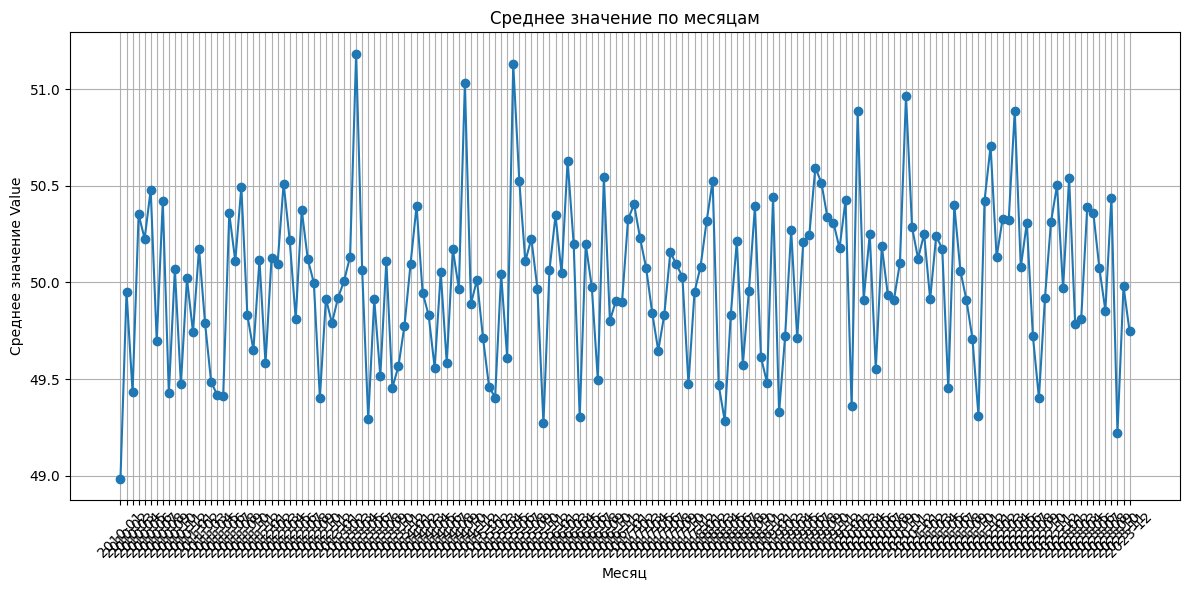

In [7]:
# 5. Визуализация среднего значения по месяцам
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['Month'].astype(str), monthly_avg['Value'], marker='o')
plt.title('Среднее значение по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее значение Value')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
# Получаем данные по колонке 'Description' для heatmap
# Объединим все строки в одну и посчитаем частотность символов
descriptions = ''.join(ddf['Description'].compute()).lower()  # Преобразуем в нижний регистр


In [9]:
# Подсчитываем частоту символов
char_freq = pd.Series(list(descriptions)).value_counts().sort_index()


In [11]:
# Создаем DataFrame для heatmap
char_freq_df = char_freq.reset_index()  # Переводим Series в DataFrame
char_freq_df.columns = ['Character', 'Frequency']  # Переименовываем колонк

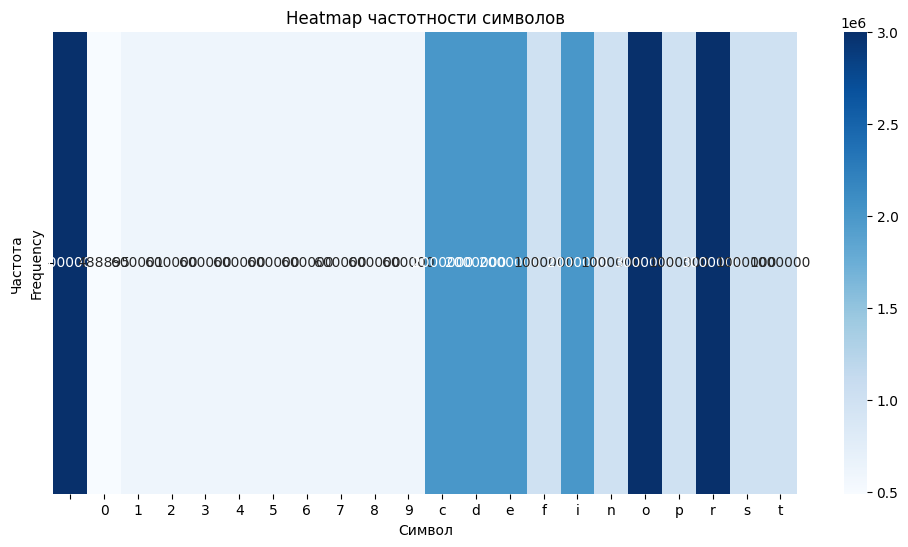

In [13]:
# Создание heatmap
# Поскольку это тепловая карта частот, мы можем просто создать матрицу частоты
heatmap_data = char_freq_df.pivot(index='Character', columns='Frequency', values='Frequency')
plt.figure(figsize=(12, 6))
sns.heatmap(data=char_freq_df.set_index('Character').T, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Heatmap частотности символов')
plt.xlabel('Символ')
plt.ylabel('Частота')
plt.show()